<h1> Комментарий ревьюера </h1>

Привет, Денис!
Меня зовут Виктория Ильина, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет не комфортно, обязательно сообщи и мы перейдем на "вы". 

Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе стать специалистом по Data Science. Ты уже проделал большую работу над проектом, но давай сделаем его ещё лучше. Ниже ты найдёшь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать различные цвета, чтобы было легче воспринимать мои комментарии:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Однако, если перед нами стоит цель не просто сдать проект и забыть, а приобрести новые знания и успешно применять их в будущем, я бы всё-таки рекомендовала тебе прорабатывать эти недочёты.
</div>
    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Так я выделю все остальные комментарии.
</div>
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

Давай посмотрим, что получилось!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Подключим необходимые модули и библиотеки Python, а также создадим константы.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st

# Константа псевдослучайности для алгоритмов обучения
RANDOM = 1111
# Генератор псевдослучайности для бутстреп выборок
RANDOM_GEN = np.random.RandomState(RANDOM)

### Загрузка данных
Данные предоставлены в виде 3-х csv-файлов, каждый файл описывает скважины одного региона.

In [2]:
region_0 = pd.read_csv('/datasets/geo_data_0.csv')
region_0.name = 'region_0'
region_1 = pd.read_csv('/datasets/geo_data_1.csv')
region_1.name = 'region_1'
region_2 = pd.read_csv('/datasets/geo_data_2.csv')
region_2.name = 'region_2'

### Предварительный осмотр данных
- Посмотрим первые 5 строк таблиц,
- Основные статистики количественных переменных,
- Сводную информацию от таблицах.

In [3]:
for region in (region_0, region_1, region_2):
    print('='*40, region.name, '='*40)
    print('\nПервые десять строк таблицы.')
    display(region.head())
    print('*'*60,'\nОсновные статистики количественных переменных.')
    display(region.describe())
    print('*'*60,'\nСводная информация о таблице.')
    display(region.info())

======================================== region_0 ========================================

Первые десять строк таблицы.


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


************************************************************ 
Основные статистики количественных переменных.


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


************************************************************ 
Сводная информация о таблице.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

======================================== region_1 ========================================

Первые десять строк таблицы.


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


************************************************************ 
Основные статистики количественных переменных.


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


************************************************************ 
Сводная информация о таблице.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

======================================== region_2 ========================================

Первые десять строк таблицы.


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


************************************************************ 
Основные статистики количественных переменных.


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


************************************************************ 
Сводная информация о таблице.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

1) По всем трём регирнам информация предоставлена в виде таблиц с одинаковой структурой:
- `id` — индентификатор скважины,
- `f0`, `f1`, `f2` — три физических характеристики скважины,
- `product` — объём запасов скважины.

2) Данные в таблице предоставлены типами: object, float64.

3) Размеры таблиц для всех регионов равны 100000 скважин.

4) Статистики по количественным значениям для всех регионов находятся в пределах одного порядка.

5) Пропуски в данных отсутствуют.

### Проверка на наличие явных дубликатов

In [4]:
for region in (region_0, region_1, region_2):
    print('='*20, region.name, '='*20,
          '\nКоличество явных дубликатов:', region.duplicated().sum(), '\n')

==================== region_0 ==================== 
Количество явных дубликатов: 0 

==================== region_1 ==================== 
Количество явных дубликатов: 0 

==================== region_2 ==================== 
Количество явных дубликатов: 0 



### Удаление столбцов не несущих информации
Столбец `id` не несёт полезной информации для прогнозирования результата, удалим его из таблиц.

In [5]:
region_0 = region_0.drop('id', axis=1)
region_0.name = 'region_0'
region_1 = region_1.drop('id', axis=1)
region_1.name = 'region_1'
region_2 = region_2.drop('id', axis=1)
region_2.name = 'region_2'

### Проверка корреляции между признаками
Проверим корреляцию Пирсона между признаками.

In [6]:
for region in (region_0, region_1, region_2):
    print('='*10, 'Корреляция для',region.name, '='*10)
    print(region.corr(), '\n')

========== Корреляция для region_0 ==========
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000 

========== Корреляция для region_1 ==========
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000 

========== Корреляция для region_2 ==========
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000 



Видно, что данные для регионов носят разный характер:

1) `region_0` имеет корреляцию -0.44 между признаками `f0` и `f1`, а также корреляцию 0.48 между признаками `f2` и `product`,

2) `region_1` имеет очень сильную корреляцию 0.9994 между признаками `f2` и `product`,

3) `region_3` имеет корреляцию 0.45 между признаками `f2` и `product`.

Заметно, что признак `f2` имеет большое влияние на объём запасов скважины, для всех регионов.

### Проверка выбросов на гистограмме
Потроим гистограммы распределения признаков.

========== Гистограммы распределения признаков region_0 ==========


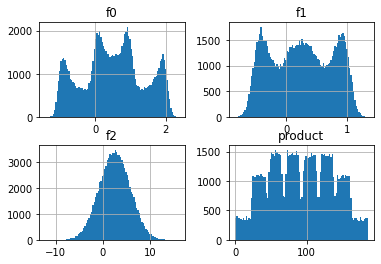

========== Гистограммы распределения признаков region_1 ==========


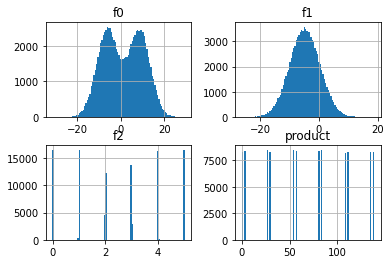

========== Гистограммы распределения признаков region_2 ==========


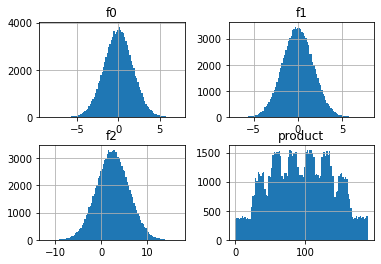

In [7]:
for region in (region_0, region_1, region_2):
    print('='*10, 'Гистограммы распределения признаков',region.name, '='*10)
    region.hist(bins=100)
    plt.show()

Каких то явных выбросов на гистограммах не выявлено.

**Данные подготовлены для создания модели.**

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Молодец,что решил подробно подойти к изучению данных с которыми тебе придётся работать.
</div>

## Обучение и проверка модели

Создадим функцию, которая будет строить модель для одного региона (в дальнейшем применим её для всех регионов).

Входным парметром будет DataFrame соответсвующего региона, возвращаться будут целевой признак и предсказание для модели.

In [8]:
def model_region(region):
    
    # разбиение на значимые и целовой признаки
    features = region.drop('product', axis=1)
    target = region['product']
    
    # разделим данные на обучающую и валидациооную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, train_size=0.75, random_state=RANDOM)
       
    model = LinearRegression()
    model.fit(features_train, target_train)
    return target_valid, model.predict(features_valid)

Применим функцию `model_region` для 3-х регионов, сохраним значения целевого признака и предсказаний для моделей в словаре `regions_result`.

Также выведем среднее предсказанное значение объёма сырья для скважины и RMSE для модели на валидационной выборке.

In [9]:
regions_result = {}

for region in (region_0, region_1, region_2):
    target_valid, predicted_valid = model_region(region)
    
    regions_result[region.name] = {'target_valid': target_valid,
                                   'predicted_valid': pd.Series(predicted_valid, index=target_valid.index)}
                              
    print(f'Модель {region.name}:\n'
          f'средний запас предсказанного сырья для скважины - {predicted_valid.mean():.5} тыс. баррелей.\n'
          f'RMSE модели на валидационной выборке - {mean_squared_error(target_valid, predicted_valid) ** 0.5:.5}\n')

Модель region_0:
средний запас предсказанного сырья для скважины - 92.508 тыс. баррелей.
RMSE модели на валидационной выборке - 37.673

Модель region_1:
средний запас предсказанного сырья для скважины - 69.045 тыс. баррелей.
RMSE модели на валидационной выборке - 0.89209

Модель region_2:
средний запас предсказанного сырья для скважины - 95.047 тыс. баррелей.
RMSE модели на валидационной выборке - 39.94



Как видно по значению RMSE для region_1, в этом регионе предсказания имеют очень высокую точность, вероятно это связано с лучшим качеством сбора признаков в регионе, либо их предварительной подготовкой.

Модели для region_0 и region_2  имеют схожие результаты, предсказание среднего значения для region_2 немного выше, но и ошибка немного выше.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Как видно из полученных данных, для Регионов 1 и 3 показатели средний объем запасов и квадратный корень из средней квадратичной ошибки (RMSE) очень близки. 

При этом для Региона 2 показатель RMSE меньше единицы, что в 40 раз меньше аналогичного показателя для Регионов 1 и 3 - это говорит о более точных предсказаниях модели для Региона 2. Такая точность скорее всего вызвана прямой корреляцией параметра `f2` и объема запасов в регионе `product`, а также выбранным алгоритмом обучения с помощью линейной регрессии.
</div>

## Подготовка к расчёту прибыли

Создадим переменные с ключевыми показателями для расчёта прибыльности скважин в регионах.

In [10]:
BOREHOL_TEST = 500 # количество исследуемых точек в регионе
BOREHOL_BEST = 200 # количество лучших точек для разработки (количество скважин)
BUDGET = 1e10 # бюджет на разработку скважин в регионе
BARREL_PRICE = 450 # доход с одного барреля сырья
PRODUCT_PRICE = 450_000 # доход с единицы продукта (1000 * доход с барреля)
PROBABILITY_LOSS = 0.025 # допустимая вероятность убытков для региона
BOOTSTRAP_COUNT = 1000 # количество выборок для бутстреп

Расчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [11]:
print(f'Для безубыточной разработки, скважина должна содеражть: {(BUDGET / BOREHOL_BEST) / PRODUCT_PRICE:.5} тыс. баррелей.')

Для безубыточной разработки, скважина должна содеражть: 111.11 тыс. баррелей.


Объём безубыточной разработки скважины, превышает средние значения предсказаний для каждого региона. Что говорит о нецелесообразности разработки, но вероятно после выборочной оценки по лучшим точкам ситуация изменится.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Всё верно рассчитано. Во всех регионах концентрация продукта слишком низкая, чтобы выбирать точки случайно.
</div>

## Расчёт прибыли и рисков 

### Создание функции для расчёта прибыли по выбранным скважинам и предсказаниям модели

Функция `profit`  производит расчёт прибыли на основании ранее созданных переменных. Возвращает прибыль для 200 (`BOREHOL_BEST`) лучших скважин в регионе (`target`), выбранных из случайной выборки с возвратом () тестовых предсказаний (`predict`) размером 500 (`BOREHOL_TEST`).

In [12]:
def profit(target, predict):
    
    predict_test = predict.sample(n=BOREHOL_TEST, replace=True, random_state=RANDOM_GEN)
    index_best_200 = predict_test.sort_values(ascending=False).index[:BOREHOL_BEST]
    target_best_200 = target[index_best_200]
    
    return PRODUCT_PRICE * target_best_200.sum() - BUDGET

### Расчёт прибыли и рисков для регионов

Применим бутстреп для функции `profit`, произведём по 1000 расчётов прибыли для каждого региона.

In [13]:
bootstrap_profit = {}
for region in ('region_0', 'region_1', 'region_2'):
    bootstrap_profit[region] = np.zeros(shape=(BOOTSTRAP_COUNT,1))
    for i in range(BOOTSTRAP_COUNT):
        bootstrap_profit[region][i] = profit(regions_result[region]['target_valid'], regions_result[region]['predicted_valid'])

Посмотрим на распределения прибылей полученных технологией бутстреп.

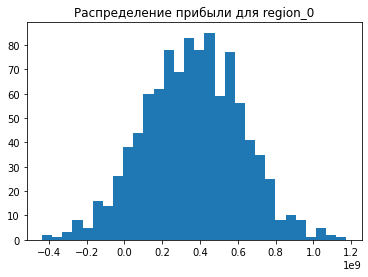

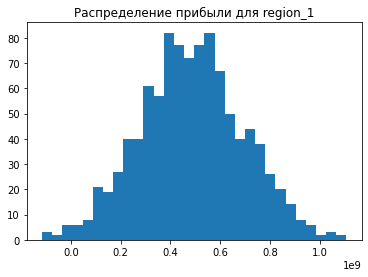

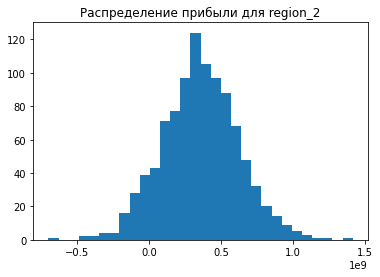

In [14]:
for region in ('region_0', 'region_1', 'region_2'):
    plt.title(label='Распределение прибыли для ' + region)
    plt.hist(bootstrap_profit[region], bins=30)
    plt.show()  

Как видно из гистограмм, распределения получились близкие к нормальным, смещённым относительно 0 вправо.

Определим количественные показатели более точно.

In [15]:
for region in ('region_0', 'region_1', 'region_2'):
    print('='*10, 'Показатели для', region, '='*10)
    print(f'Средняя прибыль : {bootstrap_profit[region].sum()/(BOOTSTRAP_COUNT*1e6):.5} млн. руб.\n'
          f'95% доверительный интервал : {st.t.interval(alpha=0.95, df=len(bootstrap_profit[region])-1, loc=bootstrap_profit[region].mean(), scale=np.std(bootstrap_profit[region]))} руб.\n'
          f'Риск убытков : {(bootstrap_profit[region]<0).sum()/BOOTSTRAP_COUNT * 100} %\n')

========== Показатели для region_0 ==========
Средняя прибыль : 361.68 млн. руб.
95% доверительный интервал : (-140113250.89631337, 863477279.7299232) руб.
Риск убытков : 8.1 %

========== Показатели для region_1 ==========
Средняя прибыль : 485.36 млн. руб.
95% доверительный интервал : (78167067.67155015, 892547233.0433682) руб.
Риск убытков : 0.8 %

========== Показатели для region_2 ==========
Средняя прибыль : 357.56 млн. руб.
95% доверительный интервал : (-164236961.00564635, 879358759.3029599) руб.
Риск убытков : 9.4 %



## Общий вывод

Исходя из полученных значений самым предпочтительным для разработки скважин является region_1, его показатели, такие как: средняя прибыль и риск убытков значительно лучше, чем у region_0 и region_2.

Но нужно иметь в виду, что входные данные для построения модели region_1 сильно отличались, вероятно использовалась отличная технология сбора данных, желательно уточнить этот момент по регионам и в дальнейшем применять схожие технологии для более "честной" оценки.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b>  Абсолютно верно, ты молодец, что с первого раза правильно рассчитал убытки и доверительный интервал, это правда редкость в этом проекте. Помимо критерия риска и средней прибыли в регионе 1 сграницы доверительного интервала положительные. Мне понравилась твоя сноска в выводе, что данные стоит перепроверить
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Спасибо тебе за проделанную работу! Мне понравился твой проект. Полностью описан ход решения, даны все необходимые пояснения, выводы полные и логичные. И ответы правильные с первого раза😉
    
Работа зачтена, отправляю обратно, чтобы ты мог задать какие-то вопросы, может хочешь какую-то подборку статей.
    
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо тебе за ревью! Приятно когда хвалят )
    
У меня осталось некоторое непонимание данного проекта и его задач, хотелось бы понять верно ли я рассуждаю:
    
    1) заявленной целью проекта является оценка рисков и выбор лучшего региона для разработки скважин,
    
    2) по факту целью проекта стало создание модели и проверка её на вменяемость,
    
    3) тоесть, в реальном бизнесе нет необходимости строить модель и предсказывать объём сырья, для скважин у которых объём сырья изначально задан (история прошлых бурений или ещё каким то образом), можно просто брать лучшие скважины тем же бутстрепом и оценивать прогнозы по разработке.

Получается, что проект некорректно построен, тем самым вводит в некоторое заблуждение по бизнес задаче?
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Допустим разрабатывается регион скважин, есть пробуренные и обследованные. Есть пробуренные и недообследованные, потому что долго и дорого. Так вот по известным скважинам мы делаем предсказание и оцениваем риски модели, а потом принимаем решение о разработке новых скважин в данном регионе. Как-то так =)
    
Удачи в будущих проектах и работе =)
    
</div>